## Wrangle and Analyze Data Project 

### By Abdalla Ammar
    We will 
 1. Data Gathering
 2. Assessing Data
 3. Cleaning Data
 4. Analysis Data

In [1]:
#Import all Lib i think we will use it

import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import tweepy
import requests
import datetime

### 1- Data Gathering

#### 1.1 Read csv file

In [2]:
#Read our CSV file
tw_arc = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
tw_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
tw_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 1.2 load Image predictions progamming

In [5]:
#load Image predictions progamming

link_url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
res = requests.get(link_url)
with open('image-predictions-3.tsv','wb') as file:
    file.write(res.content)
    
img_pred = pd.read_csv('image-predictions-3.tsv', sep='\t')

In [6]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 1.3Load tweet-json By code

In [8]:
#Load tweet-json By code
link_url_1='https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
res_1=requests.get(link_url_1)
d=res_1.content.decode('utf-8')
twt_jsn=pd.read_json(d,lines=True)
twt_jsn.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
#filter what we want 
twt_count = twt_jsn[['id','favorite_count','retweet_count','display_text_range']]

In [10]:
twt_count.head()

,id,favorite_count,retweet_count,display_text_range
0,892420643555336193,39467,8853,"[0, 85]"
1,892177421306343426,33819,6514,"[0, 138]"
2,891815181378084864,25461,4328,"[0, 121]"
3,891689557279858688,42908,8964,"[0, 79]"
4,891327558926688256,41048,9774,"[0, 138]"


### 2  Assess

We will check for:
- Quality Issues
- Tidiness Issues
- Find missing values

In [11]:
tw_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
#tw_arc.describe()

In [13]:
tw_arc.duplicated().any()

False

In [14]:
tw_arc[tw_arc['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
tw_arc['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Shikha       1
Nico         1
Timber       1
Raphael      1
Mairi        1
Name: name, Length: 957, dtype: int64

In [16]:
tw_arc['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
tw_arc['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
tw_arc['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
tw_arc['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
#Check_duplicated
img_pred.duplicated().any()

False

In [23]:
img_pred.describe

<bound method NDFrame.describe of                 tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p

In [24]:
#check for retweet to same image 
img_pred['jpg_url'].value_counts()

https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg    2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg    2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg    2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg    2
                                                  ..
https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg    1
https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg    1
https://pbs.twimg.com/media/CVBzbWsWsAEyNMA.jpg    1
https://pbs.twimg.com/media/CW4q7jDWkAA2y8g.jpg    1
https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [25]:
twt_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   favorite_count      2354 non-null   int64 
 2   retweet_count       2354 non-null   int64 
 3   display_text_range  2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [26]:
#twt_count.duplicated().any()

## Summry 
    
### Quality    
  
1- Columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) should be integers or strings.
 
2- The name column have values that aren't names like 'a, an, the'

3-  Some tweets have same URL and it's retweets 

4- The ratings are not extracted correctly especially decimals.

5-  Some coulmn we do,t need will drop

6- Clean dog image table and put it in 3 uniqe columns

7- export only text range

8- In several columns null objects are non-null.

9- Missing values from images dataset 2075 rows and the original is 2356 
 
 
 
   ### Tidiness
  1- Dog stage split to 4 columns (doggo, floofer, pupper, puppo)and we don't need it we will make a unique one column
  
  2- Merge tweets info' and Image predictions  into 'final_clean'.
 
 
  

### 3-  Cleaning

### 1-tw_arc

In [27]:
#Make a copy 
tw_arc_clean = tw_arc.copy()
img_pred_clean = img_pred.copy()
twt_count_clean = twt_count.copy()

#####  3.1.1 

DEFINE ISSUE : Columns (in_reply_to_status_id, in_reply_to_user_id) should be integers or strings.
  


#### 3.1.2 

CLEAN ISSUE 

In [28]:
tw_arc_clean['in_reply_to_status_id'] = tw_arc_clean['in_reply_to_status_id'].astype('str')
tw_arc_clean['in_reply_to_user_id'] = tw_arc_clean['in_reply_to_user_id'].astype('str')
#tw_arc_clean['retweeted_status_id'] = tw_arc_clean['retweeted_status_id'].astype('str')
#tw_arc_clean['retweeted_status_user_id'] = tw_arc_clean['retweeted_status_user_id'].astype('str')




In [29]:
tw_arc_clean['timestamp'] = pd.to_datetime(tw_arc_clean['timestamp'])
tw_arc_clean['retweeted_status_timestamp'] = pd.to_datetime(tw_arc_clean['retweeted_status_timestamp'])

#### 3.1.3

Test 

In [30]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### 3.2.1 

DEFINE ISSUE : The name column have values that aren't names like 'a, an, the'

#### 3.2.2
Clean

In [31]:
tw_arc_clean.name = tw_arc_clean.name.str.replace('^[a-z]+', 'None')

In [32]:
tw_arc_clean['name']=tw_arc_clean['name'].str.replace(r'\b[a-z][a-zA-Z0-9]*\b', 'None')

#### 3.2.3 

Test

In [33]:
tw_arc_clean['name'].value_counts()

None       854
Charlie     12
Cooper      11
Oliver      11
Lucy        11
          ... 
Clarkus      1
Bobbay       1
Beemo        1
Socks        1
Mairi        1
Name: name, Length: 932, dtype: int64

#### 3.3.1 

Issuse : Dogs has none value and other some dogs has multiple type

#### 3.3.2
Clean

In [34]:


tw_arc_clean.loc[tw_arc_clean.floofer == 'None', 'floofer'] = ''
tw_arc_clean.loc[tw_arc_clean.puppo == 'None', 'puppo'] = ''
tw_arc_clean.loc[tw_arc_clean.doggo == 'None', 'doggo'] = ''
tw_arc_clean.loc[tw_arc_clean.pupper == 'None', 'pupper'] = ''


tw_arc_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


In [35]:
tw_arc_clean['dog_type'] = tw_arc_clean.floofer + tw_arc_clean.puppo + tw_arc_clean.doggo +  tw_arc_clean.pupper 
tw_arc_clean.loc[tw_arc_clean.dog_type == 'doggo ,pupper', 'dog_type'] = 'doggo,pupper'
tw_arc_clean.loc[tw_arc_clean.dog_type == 'doggo,puppo', 'dog_type'] = 'doggo,puppo'
tw_arc_clean.loc[tw_arc_clean.dog_type == 'doggo ,floofer', 'dog_type'] = 'doggo,floofer'

tw_arc_clean.loc[tw_arc_clean.dog_type == '', 'dog_type'] = 'None'

#### 3.3.3 
Test

In [36]:
tw_arc_clean.dog_type.value_counts()

None            1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
flooferdoggo       1
puppodoggo         1
Name: dog_type, dtype: int64

#### 3.4.1
Issue : Some tweets have same URL and it's retweets

#### 3.4.2 
CLean

In [37]:
#Keep the columns where retweeted_status_id is NaN
tw_arc_clean = tw_arc_clean[np.isnan(tw_arc_clean.retweeted_status_id)]

#### 3.4.3

Test

In [38]:
#CHECK
tw_arc_clean[['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']].notnull().any()

retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
dtype: bool

#### 3.5.1 
Issue : The ratings are not extracted correctly especially decimals

#### 3.5.2
Clean

In [39]:
tw_arc_clean['rating_decimals']=tw_arc_clean['text'].str.extract(r"(\d+\.\d*\/\d+)", expand=True)
tw_arc_clean['rating_decimals'].value_counts()
tw_arc_clean['rating_decimals']=tw_arc_clean['rating_decimals'].str.slice(0,-3)

In [40]:
tw_arc_clean['rating_numerator']=tw_arc_clean['rating_numerator'].astype('float')

In [41]:
tw_arc_clean.loc[tw_arc_clean['rating_decimals'].notnull(), 'rating_numerator'] = tw_arc_clean['rating_decimals']

### 3.5.3 

Test

In [42]:
tw_arc_clean['rating_numerator'].value_counts()

12.0      500
10.0      442
11.0      426
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        34
6.0        32
3.0        19
4.0        17
2.0         9
1.0         8
0.0         2
420.0       2
44.0        1
15.0        1
17.0        1
20.0        1
24.0        1
1776.0      1
9.5         1
11.27       1
204.0       1
960.0       1
13.5        1
182.0       1
165.0       1
666.0       1
144.0       1
143.0       1
121.0       1
99.0        1
11.26       1
88.0        1
84.0        1
80.0        1
60.0        1
9.75        1
50.0        1
45.0        1
Name: rating_numerator, dtype: int64

#### 3.6.1 

Issue : Drop columns we don't Need 

Drop 
in_reply_to_user_id','in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','rating_decimals'

Maybe we will drop doggo ,floofer , pupper and puppo but i will let them now                                        

#### 3.6.2
Clean

In [43]:
tw_arc_clean.drop([ 'in_reply_to_user_id','in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','rating_decimals'], axis=1, inplace=True)

#### 3.6.3
Test

In [44]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   object             
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
 12  dog_type            2175 non-null 

In [45]:
tw_arc_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,None


# Clean -img_pred

#### 3.7.1
Clean dog image table and put it in 3 uniqe columns

#### 3.7.2 
Clean

In [46]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
#Convert strings
img_pred_clean[['p1_dog','p2_dog','p3_dog']]=img_pred_clean[['p1_dog','p2_dog','p3_dog']].astype(str)
#Create new columns
img_pred_clean[['dog_1','dog_2','dog_3']]=img_pred_clean[['p1','p2','p3']]

In [48]:
#If not dog replace with 'None'
img_pred_clean.loc[img_pred_clean['p1_dog'] == 'False', 'dog_1'] = 'None'
img_pred_clean.loc[img_pred_clean['p2_dog'] == 'False', 'dog_2'] = 'None'
img_pred_clean.loc[img_pred_clean['p3_dog'] == 'False', 'dog_3'] = 'None'

In [49]:
#Capitalize
img_pred_clean['dog_1']=img_pred_clean['dog_1'].str.capitalize()
img_pred_clean['dog_2']=img_pred_clean['dog_2'].str.capitalize()
img_pred_clean['dog_3']=img_pred_clean['dog_3'].str.capitalize()
#Replace '_' with whitespace
img_pred_clean['dog_1']=img_pred_clean['dog_1'].str.replace('_', ' ')
img_pred_clean['dog_2']=img_pred_clean['dog_2'].str.replace('_', ' ')
img_pred_clean['dog_3']=img_pred_clean['dog_3'].str.replace('_', ' ')

In [50]:
img_pred_clean.head(0)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_1,dog_2,dog_3


In [51]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   object 
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   object 
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   object 
 12  dog_1     2075 non-null   object 
 13  dog_2     2075 non-null   object 
 14  dog_3     2075 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 243.3+ KB


In [52]:
#Drop not relevant columns
img_pred_clean.drop(['img_num','p1','p1_dog','p1_conf','p2','p2_dog','p2_conf', 'p3','p3_dog','p3_conf'], axis=1, inplace=True)


#### 3.7.3

Test

In [53]:
img_pred_clean.head(2)

,tweet_id,jpg_url,dog_1,dog_2,dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,Collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,Miniature pinscher,Rhodesian ridgeback


## Clean twt_count

#### 3.8.1 

Issue : export only text range 

#### 3.8.2

Clean

In [54]:
twt_count_clean.head(1)

,id,favorite_count,retweet_count,display_text_range
0,892420643555336193,39467,8853,"[0, 85]"


In [55]:
txt_count=twt_count_clean['display_text_range'].apply(pd.Series)
twt_count_clean['text_lenght']=txt_count[1]

In [56]:
twt_count_clean.head()

,id,favorite_count,retweet_count,display_text_range,text_lenght
0,892420643555336193,39467,8853,"[0, 85]",85
1,892177421306343426,33819,6514,"[0, 138]",138
2,891815181378084864,25461,4328,"[0, 121]",121
3,891689557279858688,42908,8964,"[0, 79]",79
4,891327558926688256,41048,9774,"[0, 138]",138


In [57]:
twt_count_clean.drop('display_text_range', axis=1, inplace=True)

#### 3.8.3

Test 

In [58]:
twt_count_clean.head()

,id,favorite_count,retweet_count,text_lenght
0,892420643555336193,39467,8853,85
1,892177421306343426,33819,6514,138
2,891815181378084864,25461,4328,121
3,891689557279858688,42908,8964,79
4,891327558926688256,41048,9774,138


#### 3.9.1 

Issue : Merge tweets info' and Image predictions  into 'final_clean'

#### 3.9.2

Clean

In [59]:
tw_arc_clean.duplicated().any()


False

In [60]:
img_pred_clean.duplicated().any()

False

In [61]:
twt_count_clean.duplicated().any()

False

In [62]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   object             
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
 12  dog_type            2175 non-null 

In [63]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   dog_1     2075 non-null   object
 3   dog_2     2075 non-null   object
 4   dog_3     2075 non-null   object
dtypes: int64(1), object(4)
memory usage: 81.2+ KB


In [64]:
twt_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
 3   text_lenght     2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [65]:
twt_count_clean.rename(index=str, columns={'id':'tweet_id'}, inplace=True)

In [66]:
final_clean = pd.merge(left=tw_arc_clean,
                                 right=img_pred_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [67]:
final_clean = final_clean.merge(twt_count_clean, on='tweet_id', how='inner')

#### 3.9.3

Test

In [68]:
final_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,jpg_url,dog_1,dog_2,dog_3,favorite_count,retweet_count,text_lenght
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,None,None,39467,8853,85
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,Papillon,33819,6514,138
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,Malamute,Kelpie,25461,4328,121
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador retriever,None,42908,8964,79
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,English springer,German short-haired pointer,41048,9774,138


In [69]:
final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   object             
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
 12  dog_type            1994 non-null 

## Save as a new file 

In [70]:
final_clean.to_csv('twitter_archive_master.csv')

## Analyse and visulizing 

In [71]:
df1=pd.read_csv('twitter_archive_master.csv')

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1994 non-null   int64  
 1   tweet_id            1994 non-null   int64  
 2   timestamp           1994 non-null   object 
 3   source              1994 non-null   object 
 4   text                1994 non-null   object 
 5   expanded_urls       1994 non-null   object 
 6   rating_numerator    1994 non-null   float64
 7   rating_denominator  1994 non-null   int64  
 8   name                1994 non-null   object 
 9   doggo               74 non-null     object 
 10  floofer             8 non-null      object 
 11  pupper              212 non-null    object 
 12  puppo               23 non-null     object 
 13  dog_type            1994 non-null   object 
 14  jpg_url             1994 non-null   object 
 15  dog_1               1994 non-null   object 
 16  dog_2 

In [73]:
df1.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,text_lenght
count,1994.000000,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,996.500000,7.358508e+17,12.237101,10.532096,8895.725677,2766.753260,111.522568
std,575.762538,6.747816e+16,41.471197,7.320710,12213.193181,4674.698447,26.493668
min,0.000000,6.660209e+17,0.000000,2.000000,81.000000,16.000000,13.000000
25%,498.250000,6.758475e+17,10.000000,10.000000,1982.000000,624.750000,94.000000
50%,996.500000,7.084748e+17,11.000000,10.000000,4136.000000,1359.500000,116.000000
75%,1494.750000,7.877873e+17,12.000000,10.000000,11308.000000,3220.000000,137.000000
max,1993.000000,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,148.000000


In [74]:
df1.size

41874

#### See total number of tweets during time is that increse or not 

In [75]:

df1.timestamp = pd.to_datetime(df1['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

mnth_twt = df1.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
mnth_twt = mnth_twt[['timestamp', 'tweet_id']]
mnth_twt.head()
mnth_twt.sum()

tweet_id    1994
dtype: int64

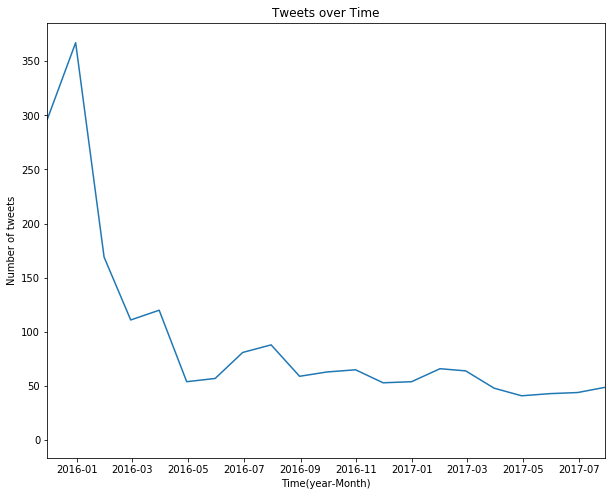

In [76]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 

plt.xlabel('Time(year-Month)')
plt.ylabel('Number of tweets')

plt.plot(mnth_twt.timestamp, mnth_twt.tweet_id)
plt.title('Tweets over Time');

#### Find most popular  breeds

In [77]:
brd=df1.groupby(by='dog_1')[['retweet_count','favorite_count']].sum()

In [78]:
brd=brd.drop('None')

In [79]:
brd_fav=brd.sort_values(by='favorite_count', ascending=False)['favorite_count'].head(7)
brd_ret=brd.sort_values(by='retweet_count', ascending=False)['retweet_count'].head(7)

Text(0.5, 1.0, 'Retweet count by breed')

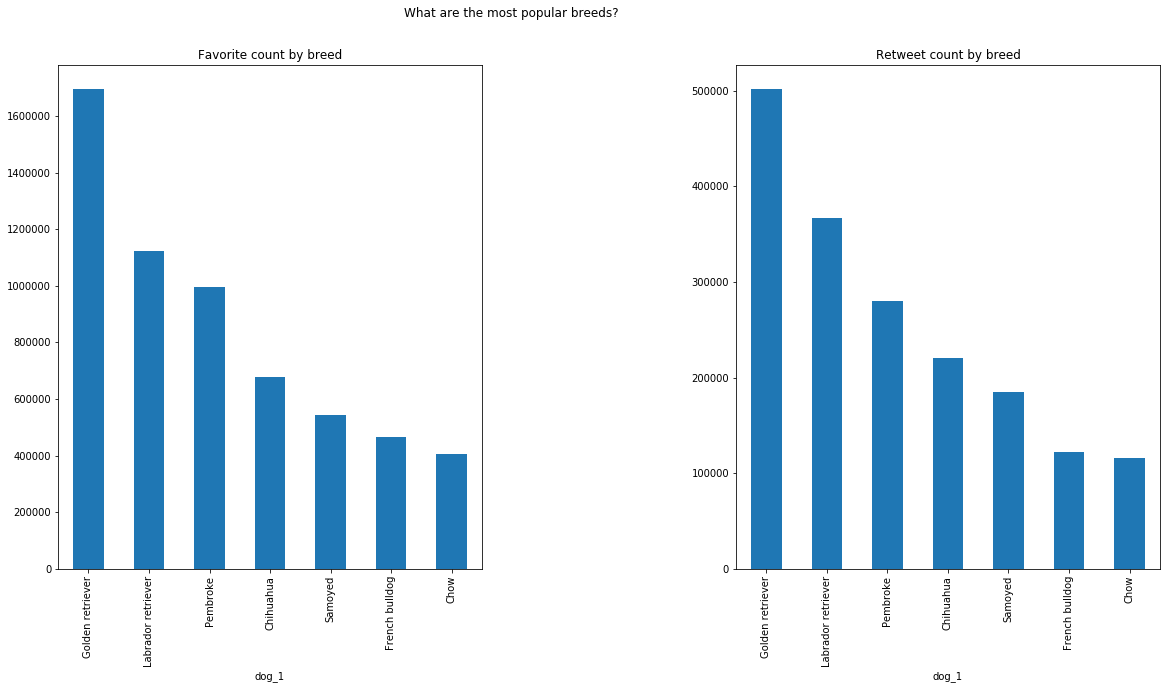

In [80]:
figure,axes = plt.subplots(1, 2)
figure.set_figheight(10)
figure.set_figwidth(18)
figure.suptitle('What are the most popular breeds?')
plt.subplots_adjust(left=0.15, bottom=0.2, right=1, top=.9, wspace=0.6, hspace=0.7)
brd_fav.plot(kind='bar', ax=axes[0]).set_title('Favorite count by breed')
brd_ret.plot(kind='bar', ax=axes[1]).set_title('Retweet count by breed')

In [81]:
#all_dogs=df1['dog_1']+df1['dog_2']+df1['dog_3']

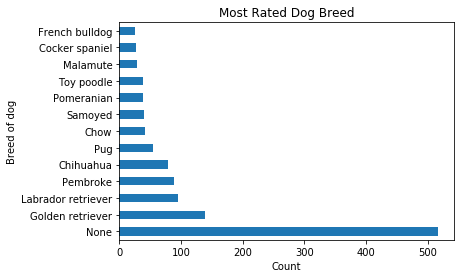

In [82]:
#all
dog_brd = df1.groupby('dog_1').filter(lambda x: len(x) >= 25)

dog_brd['dog_1'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

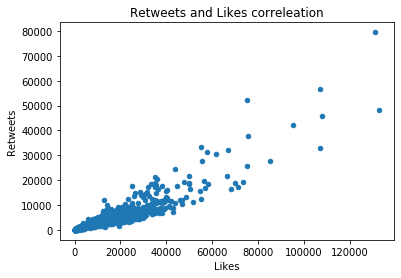

In [83]:

df1.plot(kind='scatter',x='favorite_count',y='retweet_count')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes correleation')
#i save it to use in repoting
plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight')

In [84]:
#Retweets are positively correlated with Likes.

In [85]:
#df1

#### correlation between popularity metrics and the lenght of the text

In [86]:
df1[['text_lenght','retweet_count','favorite_count']].corr()

,text_lenght,retweet_count,favorite_count
text_lenght,1.000000,-0.112192,-0.087561
retweet_count,-0.112192,1.000000,0.912947
favorite_count,-0.087561,0.912947,1.000000


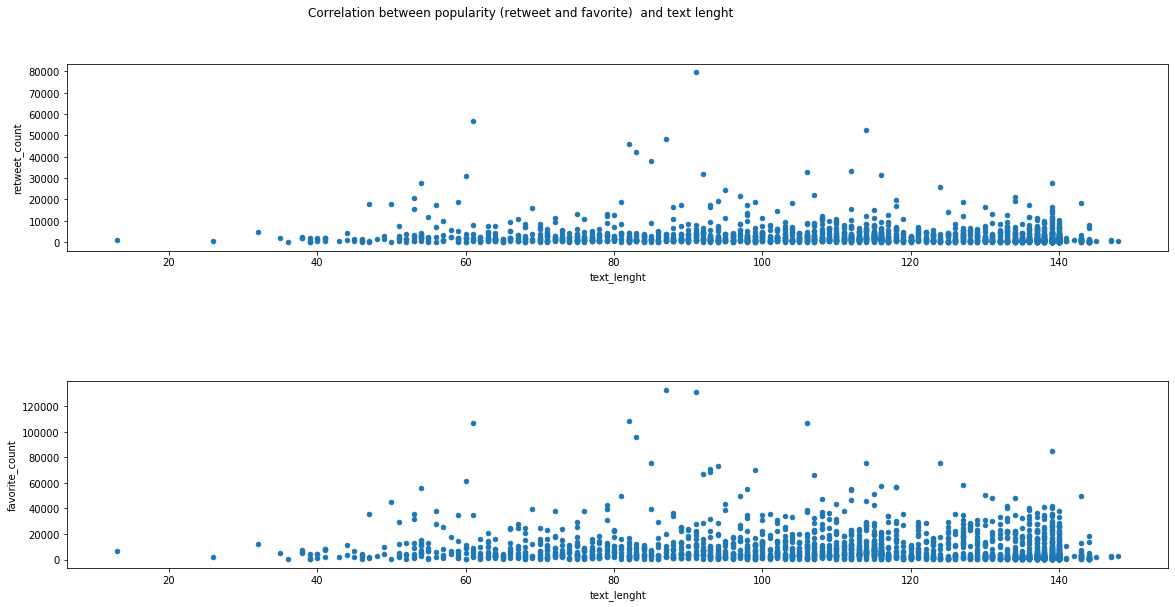

In [87]:
#Plot correlation
#plt.figure()
figure, axes = plt.subplots(2, 1)
figure.set_figheight(10)
figure.set_figwidth(18)
figure.suptitle('Correlation between popularity (retweet and favorite)  and text lenght')
plt.subplots_adjust(left=0.15, bottom=0.2, right=1, top=.9, wspace=0.6, hspace=0.7)
df1.plot(kind='scatter', x='text_lenght', y='retweet_count', ax=axes[0])
df1.plot(kind='scatter', x='text_lenght', y='favorite_count', ax=axes[1])

In [88]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'KLl522fUjmDWgdfug3ytWh8cy'
consumer_secret = 'nz8hOBvavlr8NcKrv9H3zp8CGKrebLAQNMqJO68u7e0PUsluaa'
access_token = '799264271825633280-WCSaTBPifgjg969aH8TuLQHMSETRL0L'
access_secret = 'I6Z3ubxwLPFVifIWXsgG1CBbSgmcxlglNY51JT5axbPtF'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tw_arc.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

KeyboardInterrupt: 